### Brief Documentation of Functions
#### `parse_bdf()`
Extracts the bin labels (i.e., bin names) specified in the EEGLAB bin descriptor file. Return value bins is a dictionary with the bin labels as keys and bin indices (starts from 0, not 1) as values. For instance, if BDF.txt is written as follows:
```
Bin 1
Cor_Resp
.{221}

Bin 2
Incor_Resp
.{222}
```
then the returned `bins` will be
```
{'Cor_Res': 0,
 'Incor_Resp': 1}
```

#### `align_bindata_files()`
Implements the os.walk method to find all txt files in a directory (specified by the argument path) that start with a given prefix. These bin data files exported from ERPLAB will then be aligned in accordance with the bin order in the bin descriptor file. Return value files is a list of the aligned bin data txt files. If, however, a bin is missing from the exported txt files (e.g., if you only export the critical bins), then the file for that bin will be set to the Python null object `None`.

#### `Evoked_Wrapper`
`Evoked_Wrapper` is a named tuple with attributes
- `evokeds`: a list of all the `mne.EvokedArray` instances created from ERPLAB bin data
- `info`: an instance of class `mne.Info`
- `data`: a Numpy array with shape _(n_bins, )_ where n_bins is the number of bins in the bin descriptor file, and each element of bins is itself a Numpy array of shape _(n_channels, n_timepoints)_
- `bins`: a dictionary like the one returned by the parse_bdf() function
- `ch_names`: a list of all the channel names (in MNE standard montage format)
- `tmin`: start time in milliseconds
- `tmax`: end time in milliseconds.

#### `evoked_wrapper_from_data()`
This function returns an instance of `Evoked_Wrapper` by passing the bin data to `mne.EvokedArray()` — which is done by reading the exported text files with Pandas then converting the `pandas.DataFrame` to a transposed Numpy array — to create a list of `mne.EvokedArray` instances that is the evokeds attribute. The argument `path` is the directory where the text files are; files is what's returned by `parse_bdf()`; `tmin` is the start time in seconds; info is a relevant `mne.Info` instance; `col_to_drop` is a list of the columns to drop (defaults to `[time, Unnamed: 35]`) from the `pandas.DataFrame`; `sep` is the column separator (i.e., spaces) in the bin descriptor file; `disp` (defaults to `None`), if a list `[a1, a2, ..., ak]`, will display the a1-th, a2-th, .... ak-th bin data in `pandas.DataFrame` format.

#### `plot_nice_topo()`
Implements the `mne.viz.plot_topomap()` function (which by default cannot plot colorbars; the colobars in the figure are _manually_ added with the code I found in [MNE Forum](https://mne.discourse.group/t/mne-viz-plot-topomap-and-color-bar/3141/4) — the only piece of code not written by me in this file LOL).

### Plotting single-subject averaged ERPs

In [1]:
from erp2023_visuals import *
from warnings import filterwarnings
filterwarnings('ignore')

- ⚠️ If you see a **ModuleNotFoundError: No module named pandas**, add a new cell and run
```
!pip install pandas
```
<img src="C:\\Users\\jowan\\erpclass\\pandas.jpg" width=300 alt="pandas">

In [2]:
bins = parse_bdf('S1_bdf_18bins.txt')
display(bins)
print('\n')
files = align_bindata_files(bins, 'S1_18bins_', 'avg_erp_bins')
display(files)

{'G': 0,
 'UG': 1,
 'G_Cor': 2,
 'UG_Cor': 3,
 'G_Incor': 4,
 'UG_Incor': 5,
 'LVF_G_Cor': 6,
 'RVF_G_Cor': 7,
 'LVF_UG_Cor': 8,
 'RVF_UG_Cor': 9,
 'LVF_G_NP_Cor': 10,
 'LVF_UG_NP_Cor': 11,
 'LVF_G_VP_Cor': 12,
 'LVF_UG_VP_Cor': 13,
 'RVF_G_NP_Cor': 14,
 'RVF_UG_NP_Cor': 15,
 'RVF_G_VP_Cor': 16,
 'RVF_UG_VP_Cor': 17}

['S1_18bins_G .txt',
 'S1_18bins_UG.txt',
 'S1_18bins_G_Cor .txt',
 'S1_18bins_UG_Cor.txt',
 'S1_18bins_G_Incor .txt',
 'S1_18bins_UG_Incor.txt',
 'S1_18bins_LVF_G_Cor .txt',
 'S1_18bins_RVF_G_Cor .txt',
 'S1_18bins_LVF_UG_Cor.txt',
 'S1_18bins_RVF_UG_Cor.txt',
 'S1_18bins_LVF_G_NP_Cor.txt',
 'S1_18bins_LVF_UG_NP_Cor .txt',
 'S1_18bins_LVF_G_VP_Cor.txt',
 'S1_18bins_LVF_UG_VP_Cor .txt',
 'S1_18bins_RVF_G_NP_Cor.txt',
 'S1_18bins_RVF_UG_NP_Cor .txt',
 'S1_18bins_RVF_G_VP_Cor.txt',
 'S1_18bins_RVF_UG_VP_Cor .txt']

In [ ]:
os.chdir('C:\\Users\\jowan\\erpclass')

In [3]:
pwd()

'C:\\Users\\jowan\\erpclass'

In [3]:
raw = mne.io.read_raw_eeglab('S1.set')
ch_names = raw.ch_names
ch_names = [i if 'Z' not in i else i[:-1]+'z' for i in ch_names]
ch_names[ch_names.index('FP1')], ch_names[ch_names.index('FP2')] = 'Fp1','Fp2'
to_exclude = ['M1','M2','HEO','VEO']
# M1, M2 are not EOG; just setting them to EOG so that they don't get shown in the topo 
ch_types = ['eeg' if i not in to_exclude else 'eog' for i in ch_names]
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=raw.info['sfreq'])
# Using biosemi64 so that the electrodes won't exceed the scalp boundary
info.set_montage('biosemi64', on_missing='ignore');
print('\nsampling frequency = ', info['sfreq'], 'Hz')

Reading C:\Users\jowan\erpclass\S1.fdt

sampling frequency =  1000.0 Hz


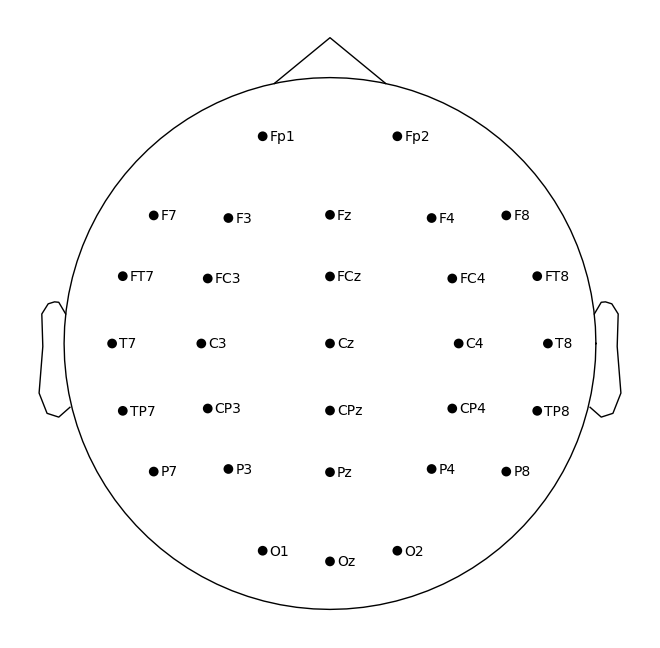

In [4]:
montage = info.get_montage()
montage.plot();

In [5]:
info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FT7, FC3, FCz, FC4, FT8, T7, C3, ...
 chs: 30 EEG, 4 EOG
 custom_ref_applied: False
 dig: 33 items (3 Cardinal, 30 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 34
 projs: []
 sfreq: 1000.0 Hz
>

In [5]:
evoked_wrapper = evoked_wrapper_from_data(bins, 'avg_erp_bins', files, -0.2, info,
                              col_to_drop=['time','Unnamed: 35'], sep='	', resample=False, disp=(1,18))

display(evoked_wrapper.evokeds[0])
display(evoked_wrapper.data.shape, evoked_wrapper.data[0].shape)

Dropping columns ['time', 'Unnamed: 35']

Your bin data text files give 34 channels x 1400 time points.
              (Note that the time points are the resampled time points if resampling is applied.)
              Please check if the dimension is correct...

Displaying the data file of your 1st bin in pandas.DataFrame format:



,FP1,FP2,F7,F3,FZ,F4,F8,FT7,FC3,FCZ,...,P7,P3,PZ,P4,P8,O1,OZ,O2,HEO,VEO
0,-1.259087,-1.705015,-0.557509,-1.820817,-1.690464,-1.527897,-1.359671,-0.555530,-1.024807,-1.036327,...,-0.357663,0.774356,0.630295,0.626909,0.002327,1.895999,2.122687,1.763100,-0.067487,1.065469
1,-1.235046,-1.662658,-0.551731,-1.772233,-1.675503,-1.559987,-1.383305,-0.547721,-0.979769,-1.022985,...,-0.367461,0.750275,0.619423,0.574389,-0.103328,1.749972,1.994693,1.598977,0.001700,1.060209
2,-1.214547,-1.624319,-0.545576,-1.722505,-1.661017,-1.590270,-1.403294,-0.539885,-0.932450,-1.007072,...,-0.377405,0.723909,0.611642,0.527365,-0.206827,1.597248,1.863045,1.436175,0.071287,1.062460
3,-1.197751,-1.591704,-0.538261,-1.672000,-1.646786,-1.616182,-1.417404,-0.531288,-0.883025,-0.987638,...,-0.386453,0.695960,0.608682,0.489489,-0.302082,1.440880,1.731438,1.281239,0.138443,1.073670
4,-1.180773,-1.561815,-0.527613,-1.620294,-1.631061,-1.633777,-1.422073,-0.519626,-0.831944,-0.963335,...,-0.391888,0.668233,0.612277,0.463247,-0.381502,1.285306,1.604690,1.140648,0.197616,1.091767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1.894054,4.031022,-1.352281,-0.989037,-0.753735,1.275457,2.886622,-1.431529,-1.217451,-2.146186,...,-2.046649,-4.881779,-5.391527,-2.874421,-2.220183,-5.236278,-5.753191,-4.277218,-1.363922,-4.134538
1396,1.943245,4.090974,-1.292828,-0.920528,-0.672317,1.358549,2.943580,-1.375031,-1.128948,-2.061622,...,-1.991400,-4.791324,-5.301259,-2.803297,-2.156489,-5.179667,-5.694311,-4.236782,-1.360295,-4.153960
1397,1.987981,4.138977,-1.243086,-0.859872,-0.597364,1.437370,2.992294,-1.327683,-1.051049,-1.986123,...,-1.943162,-4.714800,-5.223207,-2.746918,-2.087913,-5.133083,-5.647059,-4.205655,-1.358906,-4.173844
1398,2.027905,4.174656,-1.204490,-0.809200,-0.532401,1.509868,3.032716,-1.290843,-0.986685,-1.923301,...,-1.904081,-4.654193,-5.159800,-2.706590,-2.019090,-5.095240,-5.609597,-4.179939,-1.361124,-4.192309


Displaying the data file of your 18th bin in pandas.DataFrame format:



,FP1,FP2,F7,F3,FZ,F4,F8,FT7,FC3,FCZ,...,P7,P3,PZ,P4,P8,O1,OZ,O2,HEO,VEO
0,-1.214583,-2.163212,-0.780540,-1.814673,-2.243082,-2.953240,-2.047115,-0.766584,-0.705486,-1.938064,...,-0.684619,-0.025735,-0.612608,-0.819049,-0.629473,-0.019608,-0.124628,-0.460357,1.024726,2.335882
1,-1.043926,-1.944343,-0.699623,-1.647593,-2.016427,-2.636649,-1.768972,-0.682242,-0.612030,-1.693628,...,-0.636346,0.068542,-0.391333,-0.481151,-0.575870,0.040508,0.001839,-0.341747,0.873323,2.219870
2,-0.885039,-1.735317,-0.625770,-1.492011,-1.803953,-2.333096,-1.506705,-0.603476,-0.517007,-1.458340,...,-0.593514,0.162617,-0.174632,-0.183749,-0.505217,0.094897,0.126335,-0.220300,0.722211,2.095811
3,-0.748113,-1.546901,-0.563133,-1.357724,-1.618456,-2.057969,-1.274087,-0.533996,-0.424807,-1.244477,...,-0.558632,0.252551,0.027363,0.045444,-0.413150,0.138226,0.241997,-0.101675,0.577660,1.967576
4,-0.642716,-1.387910,-0.514872,-1.253317,-1.471493,-1.825084,-1.079681,-0.477316,-0.342461,-1.064434,...,-0.533603,0.333027,0.204909,0.194419,-0.303230,0.163485,0.340646,0.006102,0.444397,1.844979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,7.621954,6.362704,1.215756,3.823720,2.109612,3.354085,1.926049,1.216420,1.493041,1.445347,...,1.150195,-0.942098,0.121525,0.366853,-0.010966,-3.468063,-2.353474,-2.647844,1.863519,-5.122325
1396,7.586949,6.349133,1.210613,3.806687,2.131120,3.352720,1.936622,1.206222,1.504978,1.444364,...,1.140955,-0.879203,0.192893,0.397837,0.178173,-3.343044,-2.225198,-2.536275,1.882119,-5.107035
1397,7.575651,6.353148,1.222836,3.812153,2.170754,3.375601,1.969683,1.212956,1.532594,1.453340,...,1.149764,-0.807918,0.266376,0.415652,0.371917,-3.212566,-2.096762,-2.431233,1.930033,-5.091147
1398,7.585345,6.373049,1.250761,3.835950,2.224583,3.418552,2.015841,1.235325,1.571855,1.472501,...,1.176196,-0.731210,0.340318,0.426869,0.554299,-3.082163,-1.973803,-2.337390,2.002510,-5.076389


<Evoked | '' (average, N=1), -0.2 – 1.199 s, baseline off, 34 ch, ~415 kB>

(18,)

(34, 1400)

In [6]:
print(evoked_wrapper.tmin, evoked_wrapper.tmax)
display(evoked_wrapper.bins)

-200 1200


{'G': 0,
 'UG': 1,
 'G_Cor': 2,
 'UG_Cor': 3,
 'G_Incor': 4,
 'UG_Incor': 5,
 'LVF_G_Cor': 6,
 'RVF_G_Cor': 7,
 'LVF_UG_Cor': 8,
 'RVF_UG_Cor': 9,
 'LVF_G_NP_Cor': 10,
 'LVF_UG_NP_Cor': 11,
 'LVF_G_VP_Cor': 12,
 'LVF_UG_VP_Cor': 13,
 'RVF_G_NP_Cor': 14,
 'RVF_UG_NP_Cor': 15,
 'RVF_G_VP_Cor': 16,
 'RVF_UG_VP_Cor': 17}

Plot not saved... Please provide a valid file name to save the plot!


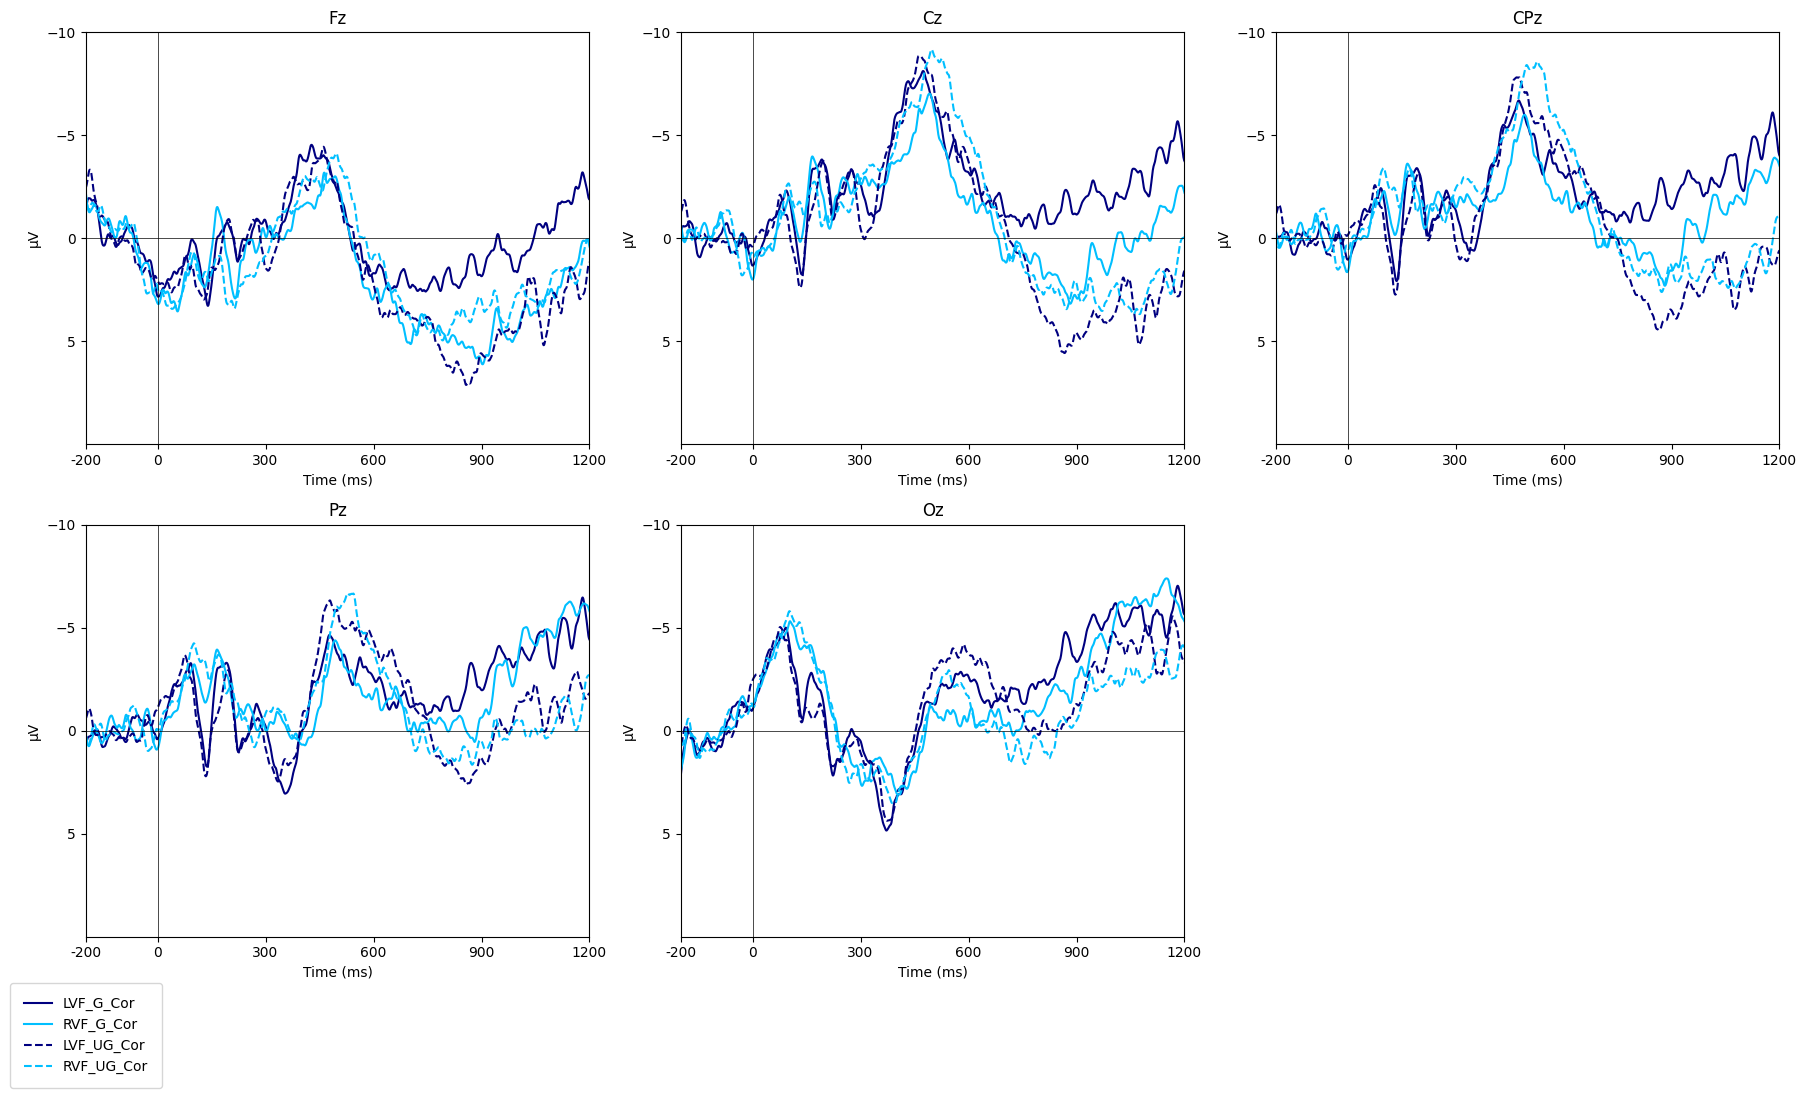

In [7]:
my_plots(evoked_wrapper, layout='Classic ERP',
        ch_to_plot=['Fz','Cz','CPz','Pz','Oz'], bins_to_plot=['LVF_G_Cor','RVF_G_Cor','LVF_UG_Cor','RVF_UG_Cor'],
        linestyles=['solid','solid','dashed','dashed'], colors=['navy','deepskyblue','navy','deepskyblue'],
        nrows=2, ncols=3, figsize=(18,10), xlim=(-200,1200), ylim=(-10,10),
        xticks=[-200,0,300,600,900,1200], yticks=list(range(-10,10,5)),
        loc='lower left', borderpad=1, bbox_to_anchor=[-0.005, -0.1],
        save=True)

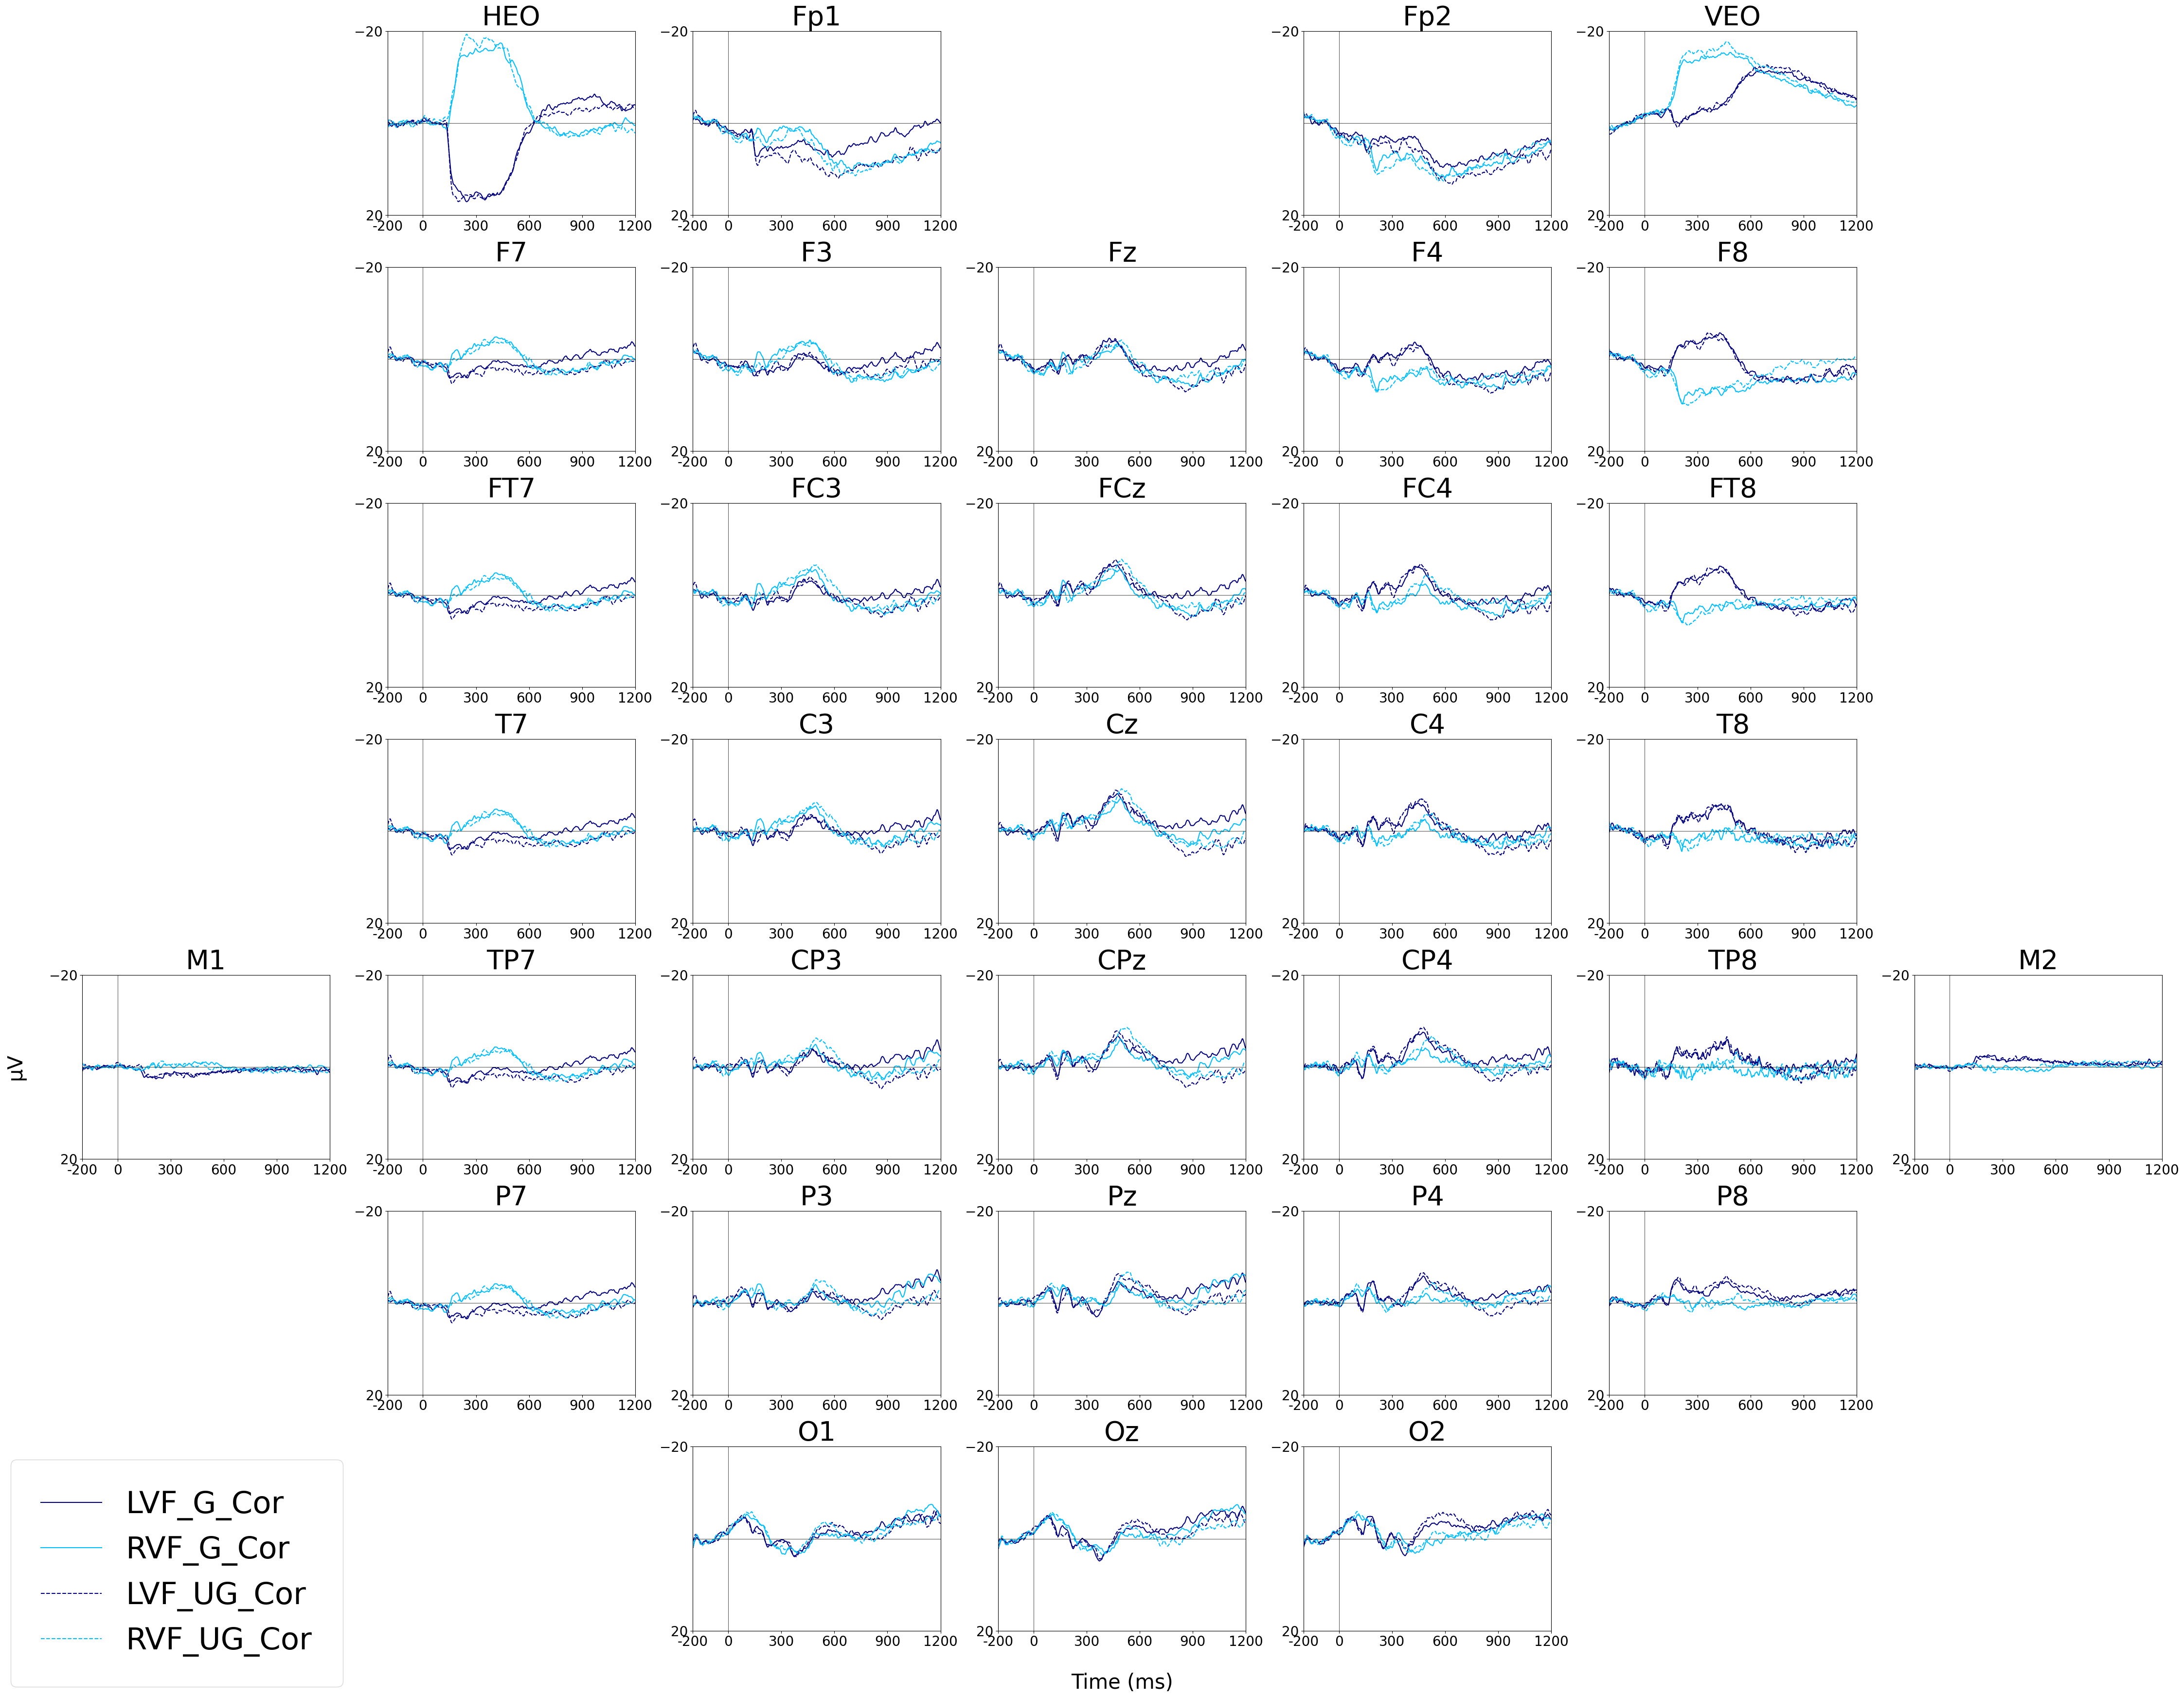

In [11]:
pos_dict = {'HEO':1,'Fp1':2,'Fp2':4,'VEO':5,
            'F7':8,'F3':9,'Fz':10,'F4':11,'F8':12,
            'FT7':15,'FC3':16,'FCz':17,'FC4':18,'FT8':19,
            'T7':22,'C3':23,'Cz':24,'C4':25,'T8':26,
            'M1':28,'TP7':29,'CP3':30,'CPz':31,'CP4':32,'TP8':33,'M2':34,
            'P7':36,'P3':37,'Pz':38,'P4':39,'P8':40,
            'O1':44,'Oz':45,'O2':46}

ch_to_plot = evoked_wrapper.ch_names
my_plots(evoked_wrapper, layout='Topo', pos_dict=pos_dict, ylabel_pos=28,
         ch_to_plot=ch_to_plot, bins_to_plot=['LVF_G_Cor','RVF_G_Cor','LVF_UG_Cor','RVF_UG_Cor'],
         linestyles=['solid','solid','dashed','dashed'], colors=['navy','deepskyblue','navy','deepskyblue'],
         nrows=7, ncols=7, figsize=(45,35), xlim=(-200,1200), ylim=(-20,20),
         xticks=[-200,0,300,600,900,1200], yticks=[-20,20],
         loc='lower left', borderpad=1, bbox_to_anchor=[-0.001, -0.001],
         save=True, fname='erpclass2023_S1.png')

### Difference waves: (Ungrammatical Correct) - (Grammatical Correct)
- Honestly, an easier way would be to do the bin operations and channel operations in ERPLAB, then export the data to plot with `my_plots()`.
- This part is just to demonstrate that bin/channel operations are doable in MNE as well.

In [8]:
# NOTE!! IMPORTANT!! The weights will depend on your AD summary
diff_evoked_wrapper = create_bin_op_evoked_wrapper(evoked_wrapper,
                                                   bin_op_weights={'UG_Cor;G_Cor':[1,-1],
                                                                   'LVF_G_Cor;LVF_UG_Cor':[63/125,62/125],
                                                                   'RVF_G_Cor;RVF_UG_Cor':[66/131,65/131]},
                                                   new_binlabels=['UG_Cor - G_Cor', 'All_LVF_Cor', 'All_RVF_Cor'])

In [9]:
for i in diff_evoked_wrapper.evokeds:
    display(i)

# What is Number of averaged epochs?

<Evoked | 'unknown - unknown' (average, N=0.5), -0.2 – 1.199 s, baseline off, 34 ch, ~415 kB>

<Evoked | '0.504 × unknown + 0.496 × unknown' (average, N=1.9998720081914756), -0.2 – 1.199 s, baseline off, 34 ch, ~415 kB>

<Evoked | '0.504 × unknown + 0.496 × unknown' (average, N=1.9998834634657967), -0.2 – 1.199 s, baseline off, 34 ch, ~415 kB>

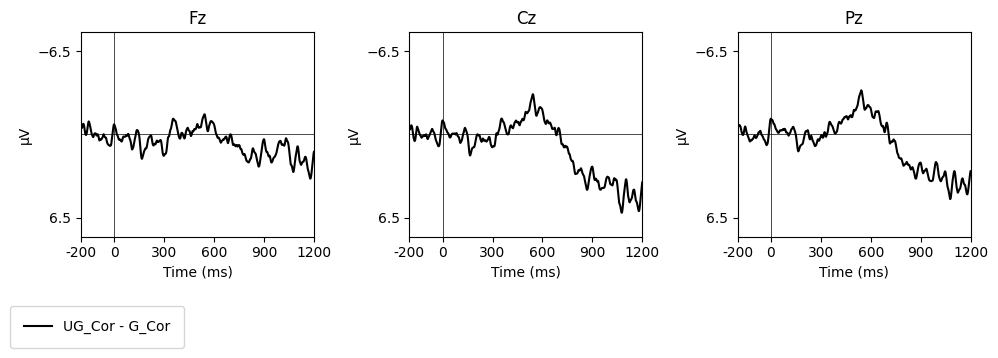

In [16]:
my_plots(diff_evoked_wrapper, layout='Classic ERP',
        ch_to_plot=['Fz','Cz','Pz'], bins_to_plot=['UG_Cor - G_Cor'],
        linestyles=['solid'], colors=['black'],
        nrows=1, ncols=3, figsize=(10,3), xlim=(-200,1200), ylim=(-8,8),
        xticks=[-200,0,300,600,900,1200], yticks=[-6.5,6.5],
        loc='lower left', borderpad=1, bbox_to_anchor=[-0.0001, -0.2], save=False)

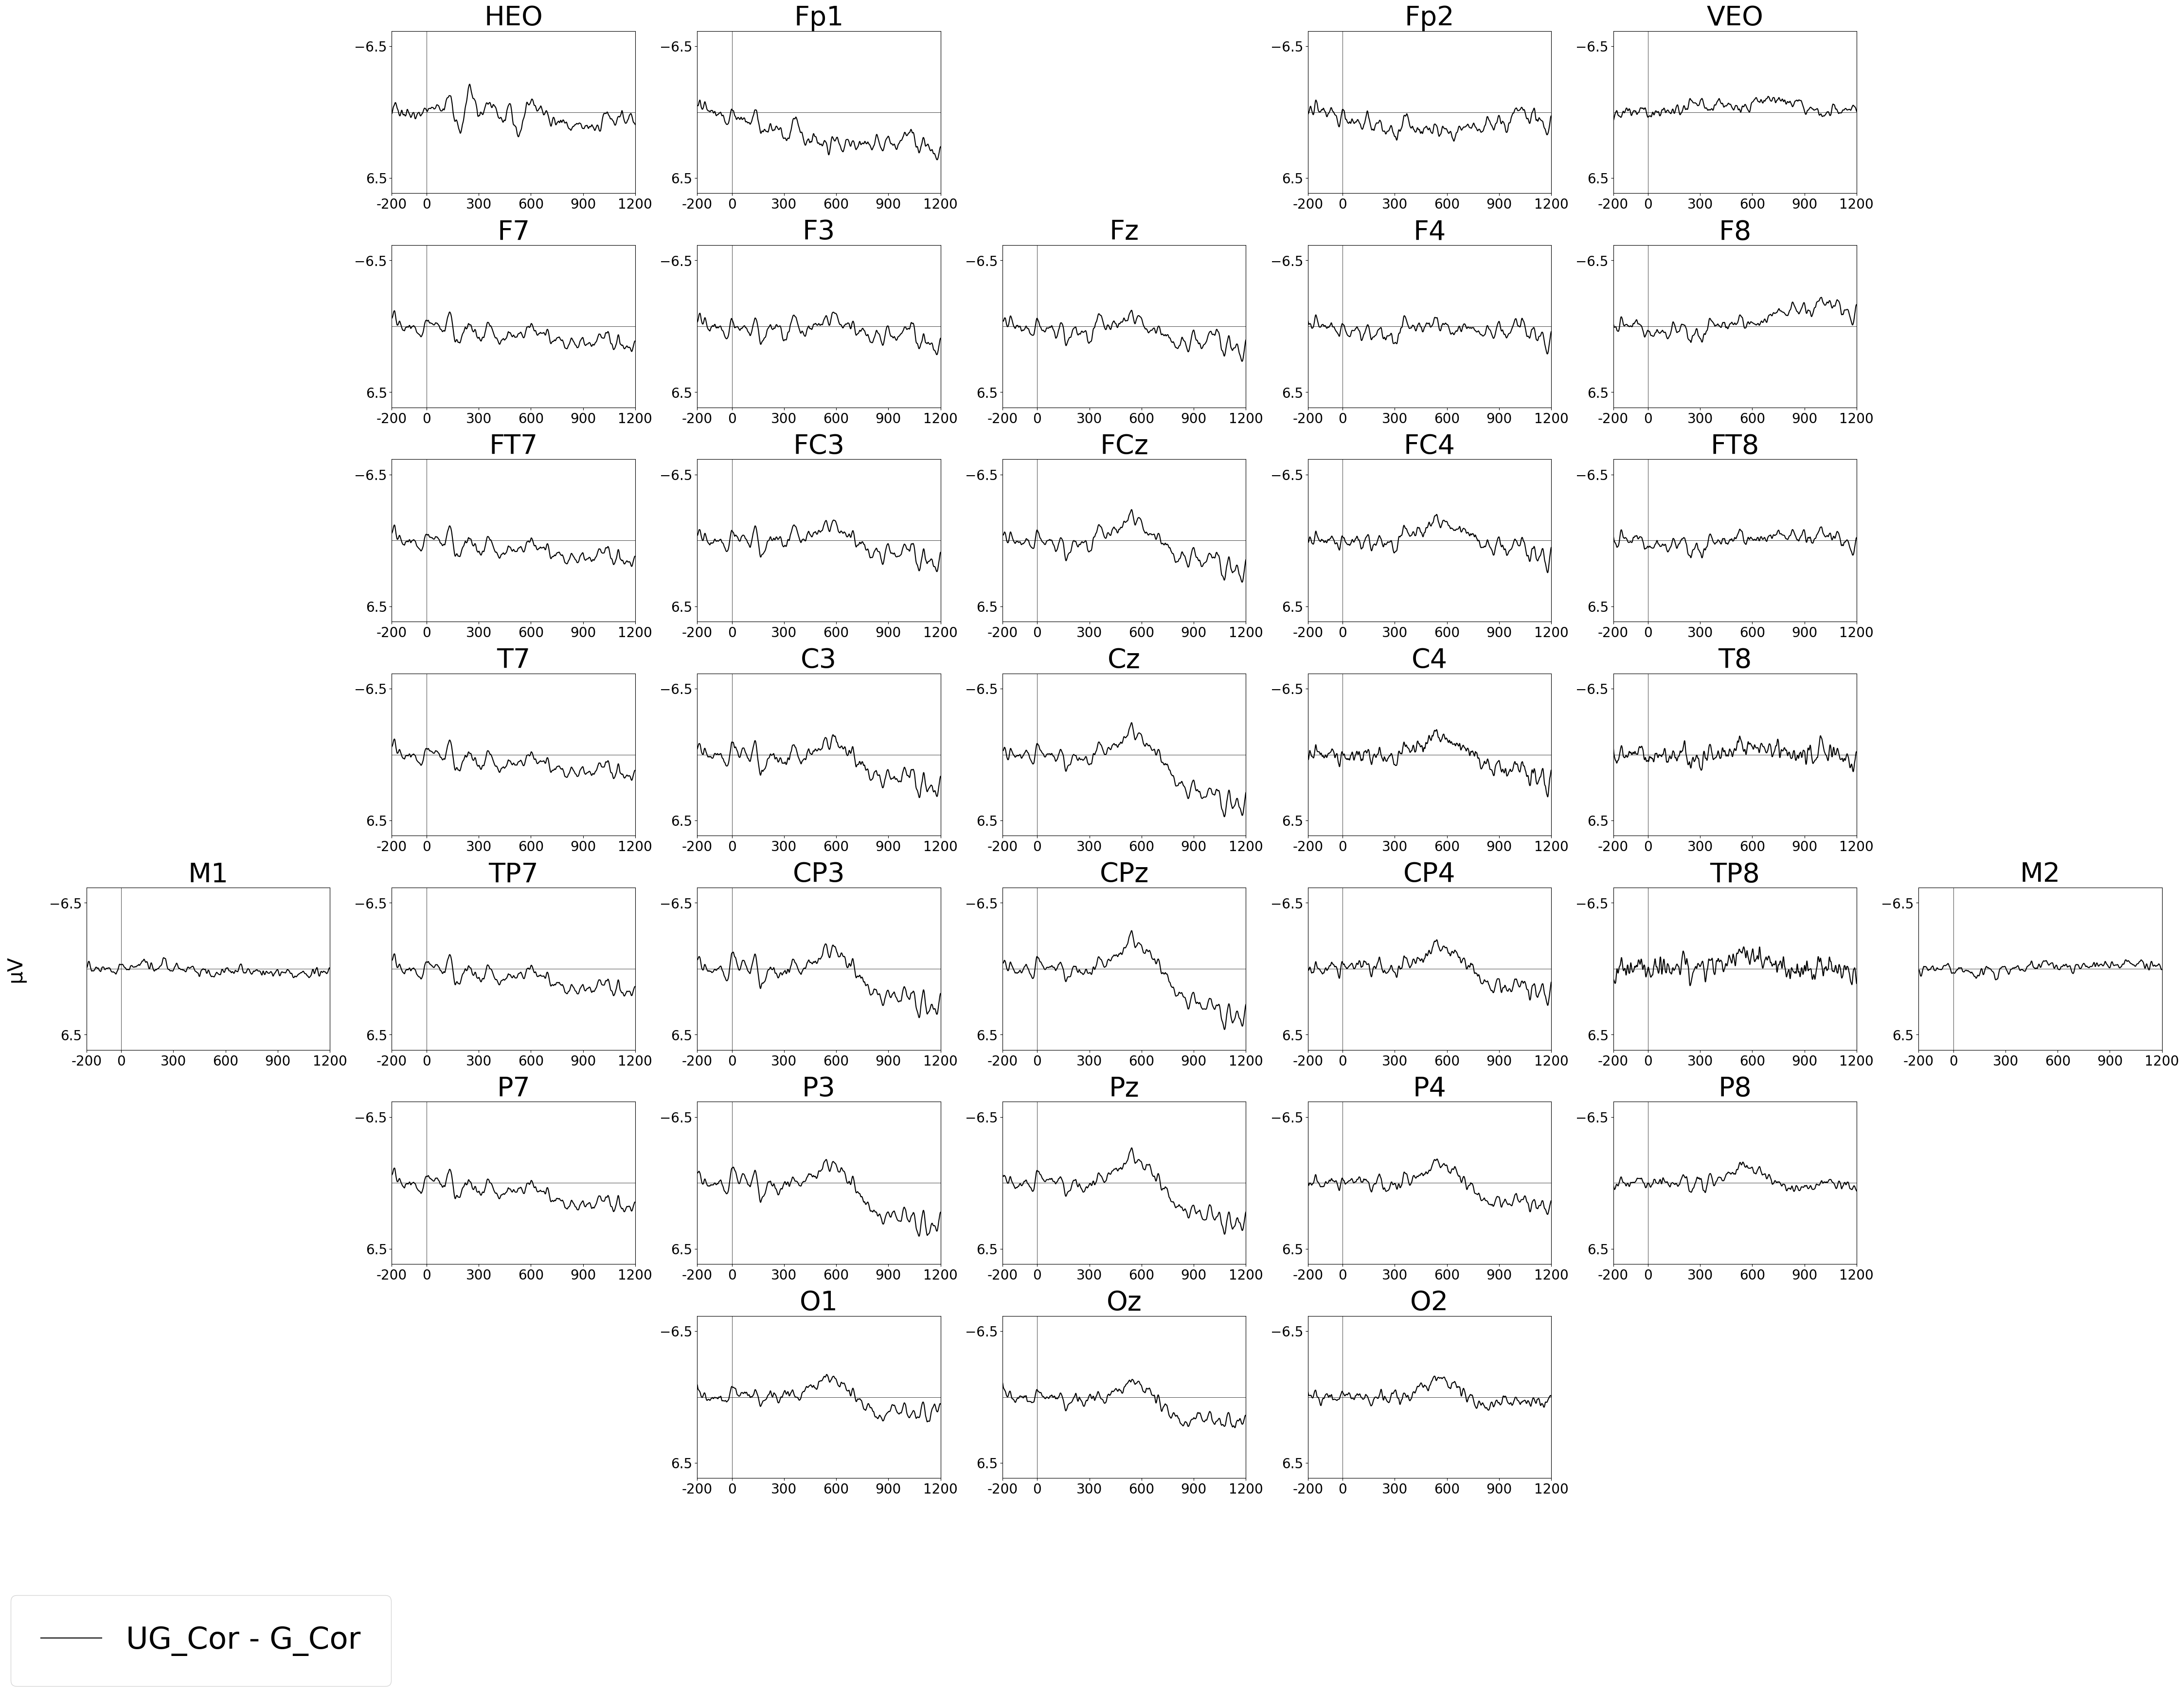

In [17]:
my_plots(diff_evoked_wrapper, layout='Topo', pos_dict=pos_dict, ylabel_pos=28,
         ch_to_plot=ch_to_plot, bins_to_plot=['UG_Cor - G_Cor'],
         linestyles=['solid'], colors=['black'],
         nrows=8, ncols=7, figsize=(45,35), xlim=(-200,1200), ylim=(-8,8),
         xticks=list([-200,0,300,600,900,1200]), yticks=[-6.5,6.5],
         loc='lower left', borderpad=1, bbox_to_anchor=[-0.001, -0.001],
         save=False)

### Difference waves: (Contralateral) - (Ipsilateral)

In [18]:
ch_dict = {}
for i, x in enumerate(diff_evoked_wrapper.ch_names):
    ch_dict[x] = i

contra_ipsi_evoked_wrapper = create_contra_ipsi_evoked_wrapper(diff_evoked_wrapper, 
                                                               bins_to_compare=['All_RVF_Cor', 'All_LVF_Cor'],
                                                               groups={'TP7-TP8': [ch_dict['TP7'], ch_dict['TP8']],
                                                                       'TP8-TP7': [ch_dict['TP8'], ch_dict['TP7']]})

In [19]:
contra_ipsi_evoked_wrapper.ch_names

['TP7-TP8', 'TP8-TP7']

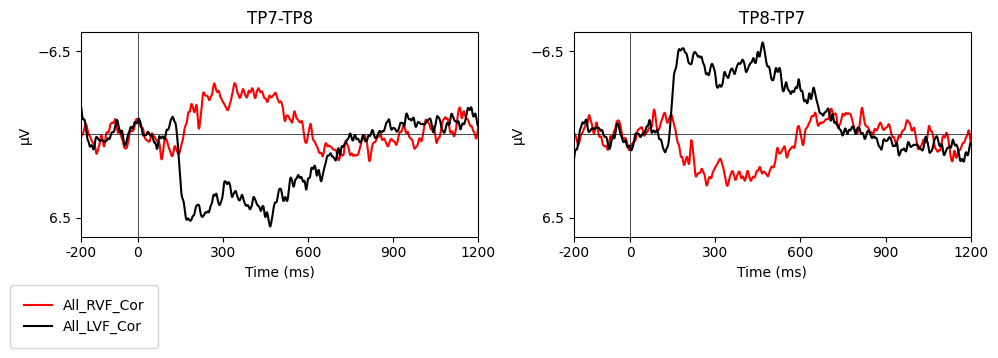

In [20]:
my_plots(contra_ipsi_evoked_wrapper, layout='Classic ERP',
        ch_to_plot=contra_ipsi_evoked_wrapper.ch_names,
        bins_to_plot=list(contra_ipsi_evoked_wrapper.bins.keys()),
        linestyles=['solid','solid'], colors=['red','black'],
        nrows=1, ncols=2, figsize=(10,3), xlim=(-200,1200), ylim=(-8,8),
        xticks=[-200,0,300,600,900,1200], yticks=[-6.5,6.5],
        loc='lower left', borderpad=1, bbox_to_anchor=[-0.0001, -0.2], save=False)

### Topo maps: (Ungrammatical Correct) - (Grammatical Correct)

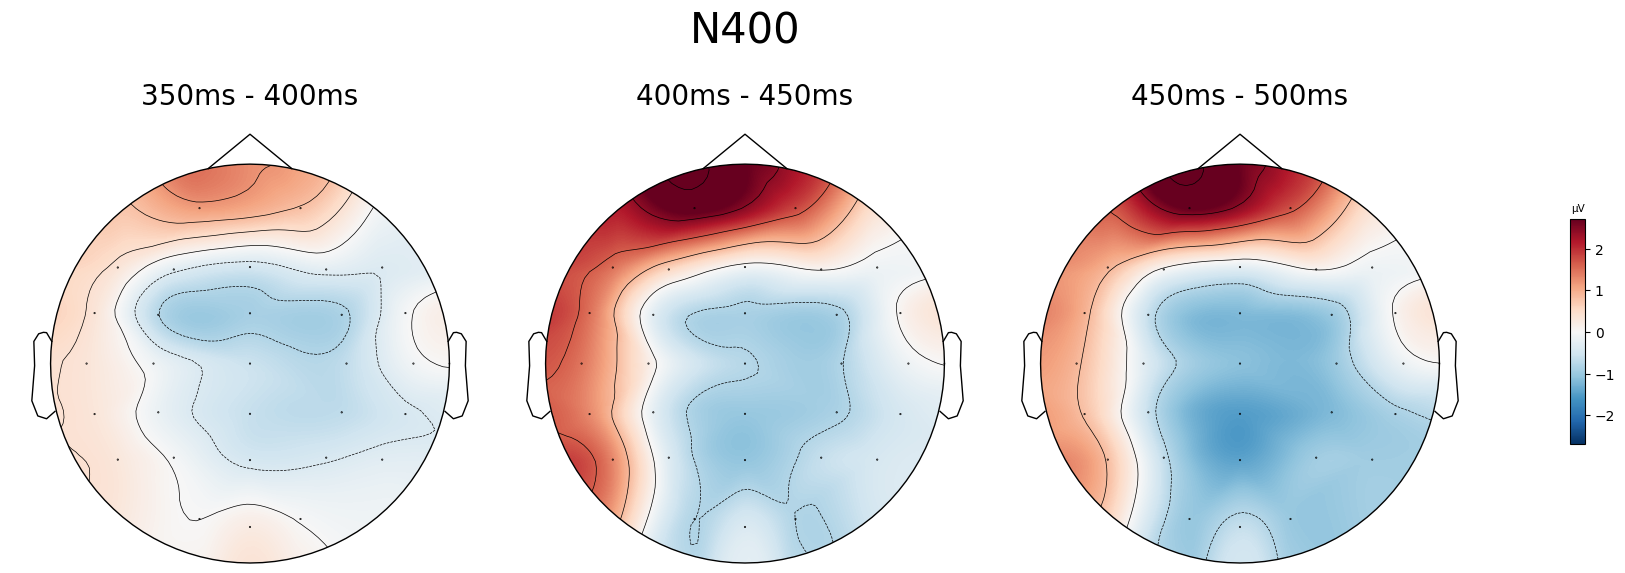

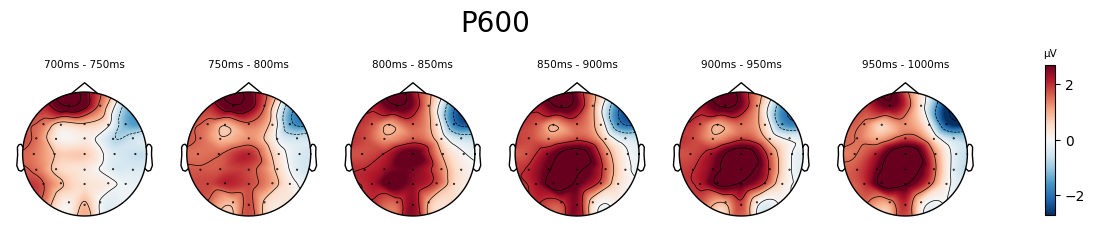

In [15]:
plot_nice_topo(diff_evoked_wrapper, drop_eog=True, bin_to_plot='UG_Cor - G_Cor', nrows=1, ncols=3,
               times=[(350,400),(400,450),(450,500)],
               vlim=(-2.7,2.7), figsize=(15,15), time_fontsize=20,
               cbar_xstart=1.05, cbar_width=0.01, cbar_ystart=0.41, cbar_height=0.15, cbar_fontsize=7.5,
               title='N400', title_x=0.5, title_y=0.7, title_fontsize=30)
plot_nice_topo(diff_evoked_wrapper, drop_eog=True, bin_to_plot='UG_Cor - G_Cor', nrows=1, ncols=6,
               times=[(700,750),(750,800),(800,850),(850,900),(900,950),(950,1000)],
               vlim=(-2.7,2.7), figsize=(10,10), time_fontsize=7.5,
               cbar_xstart=1.05, cbar_width=0.01, cbar_ystart=0.41, cbar_height=0.15, cbar_fontsize=7.5,
               title='P600', title_x=0.5, title_y=0.615, title_fontsize=20, pad=1.08)

### Exercise: Grand Average ERPs
- Plot the grand average of **S1** and **S2** in Python using the methods introduced in class.
- Plot the waveforms of **LVF_G_Cor**, **RVF_G_Cor**, **LVF_UG_Cor**, **RVF_UG_cor** at all **34 channels**, with a **topographic** layout.

- 💡Hint: You could compute the grand average in Python, but it's more complicated and would require quite a bit of coding (though I'd be happy to see you take up this challenge). As a simpler approach, recall that
```
ERPLAB > Average across ERPsets (Grand Average)
```
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; also outputs a single **.erp** file, whose bin data can be exported...

### Exercise: ERP CORE Dataset
#### Experiment Description
This experiment implemented an active visual oddball task adapted from Luck et al. (2009). The letters A, B, C, D, and E were presented in random order (p = .2 for each letter). One letter was designated the target for a given block of trials, and the other 4 letters were non-targets. Thus, the probability of the target category was .2, but the same physical stimulus served as a target in some blocks and a nontarget in others. Participants responded whether the letter presented on each trial was the target or a non-target for that block. The event codes are tabulated in the table below

<img src="C:\\Users\\jowan\\erpclass\\event-codes.png" width=600 alt="event-codes">

#### Dataset Info
The _pre_-preprocessing steps listed below follow the official documentation:
- The event codes have been <ins>shifted later in time by 26 ms</ins> to account for LCD monitor delay.
- The sampling rate during online EEG recording was 1024 Hz, but the dataset **subj01** has been <ins>offline downsampled to 256 Hz</ins> for better processing speed.
- The dataset **sub01** has been <ins>high-pass filtered with cut-off at 0.1 Hz and a 12 dB/octave roll-off</ins> to remove DC offset.
- The original file (raw data fresh off recording) had left and right HEO channels (HEOG_left and HEOG_right), but only the lower VEO channel (VEOG_lower). To obtain bipolar EOG channels, the dataset **subj01** has had EEG channel operations applied where
> HEO = HEOG_left - HEOG_right <br>
> VEO = VEOG_lower - FP2 <br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; and the original <ins>HEOG_left, HEOG_right, and VEOG_lower have been dropped</ins>, resulting in a total of 32 channels.

#### Preprocessing
You can either use a script or the GUI to perform the following:
- Load dataset
- Add channel locations (use the file `eeglab2022.1\plugins\dipfit\standard_BESA\standard-10-5-cap385.elp`)
- Create EventList
- Assign bins (please look at the event code table carefully and decide how your bin descriptor file should be written)
- Epoching and baseline correction (segment the continuous data into -200ms - 800ms epochs with -200ms - 0ms pre-stimulus baseline correction)
- Rereferencing (please rereference the data to <ins>the average of P9 and P10</ins>, which were located adjacent to the mastoids
- Auto AD with built-in ERPLAB functions
- Filtering
- Manual AD

#### Averaged ERP plots
- Compute averaged ERPs
- Plot the bins you think are critical in Python (if you've done bin operations in ERPLAB, e.g., to compute difference waves, these new bins also count)